## Importing Libraries

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
import warnings
warnings.filterwarnings("ignore")

## Problem Statement

## Data Gathering

In [2]:
boston = load_boston()
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [3]:
boston_df = pd.DataFrame(boston.data, columns= boston.feature_names)
boston_df['PRICE'] = boston.target
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


## Exploratory Data Analysis

In [4]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
boston_df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

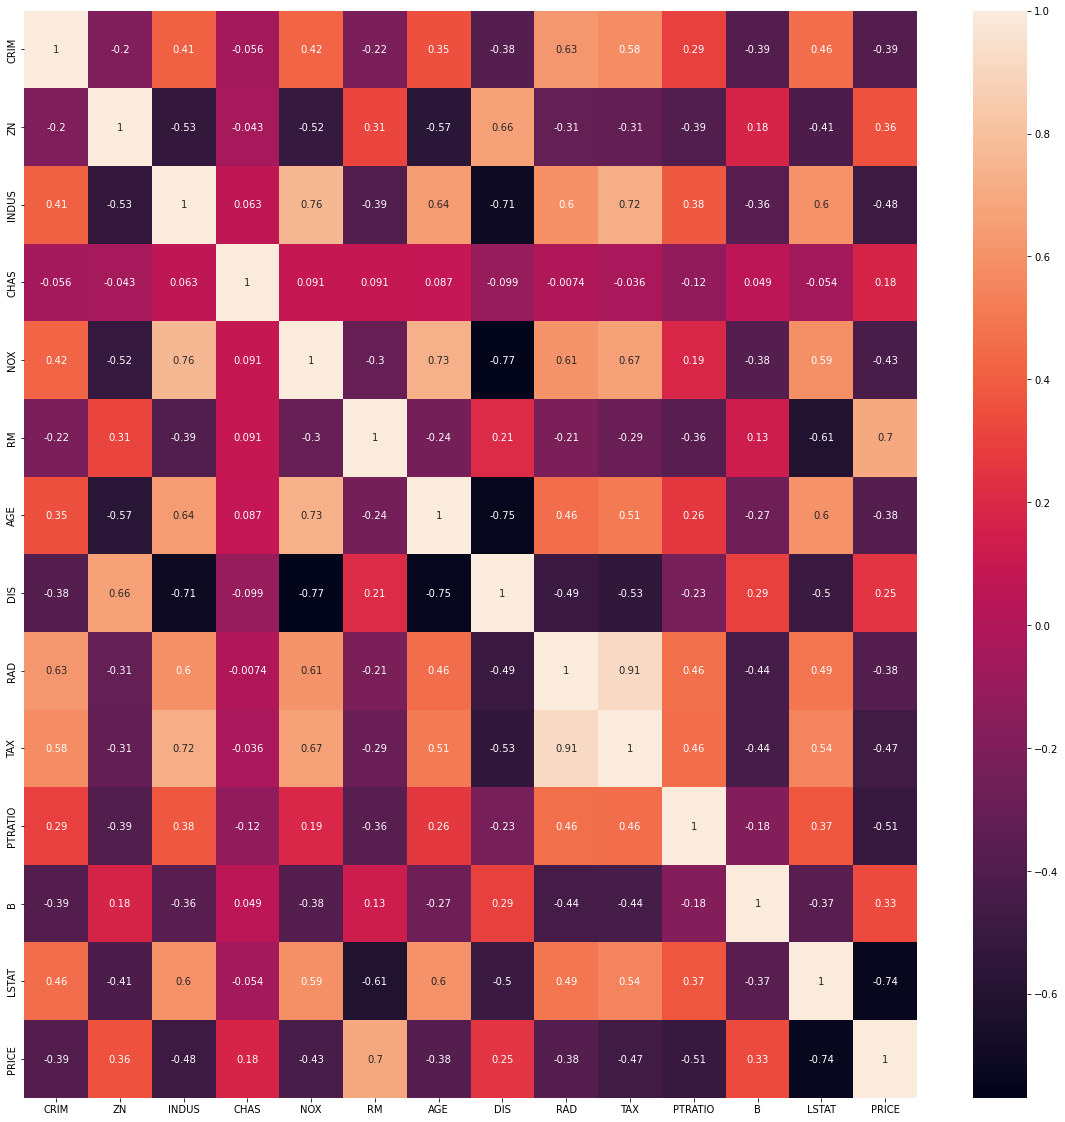

In [7]:
plt.figure(figsize=(20,20))
sns.heatmap(boston_df.corr(), annot=True)

## Splitting the data

In [8]:
x = boston_df.drop('PRICE', axis=1)
y = boston_df['PRICE']


In [9]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)# splitting the data


In [10]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [11]:
x_train

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
42,0.14150,0.0,6.91,0.0,0.448,6.169,6.6,5.7209,3.0,233.0,17.9,383.37,5.81
58,0.15445,25.0,5.13,0.0,0.453,6.145,29.2,7.8148,8.0,284.0,19.7,390.68,6.86
385,16.81180,0.0,18.10,0.0,0.700,5.277,98.1,1.4261,24.0,666.0,20.2,396.90,30.81
78,0.05646,0.0,12.83,0.0,0.437,6.232,53.7,5.0141,5.0,398.0,18.7,386.40,12.34
424,8.79212,0.0,18.10,0.0,0.584,5.565,70.6,2.0635,24.0,666.0,20.2,3.65,17.16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,0.03548,80.0,3.64,0.0,0.392,5.876,19.1,9.2203,1.0,315.0,16.4,395.18,9.25
72,0.09164,0.0,10.81,0.0,0.413,6.065,7.8,5.2873,4.0,305.0,19.2,390.91,5.52
396,5.87205,0.0,18.10,0.0,0.693,6.405,96.0,1.6768,24.0,666.0,20.2,396.90,19.37
235,0.33045,0.0,6.20,0.0,0.507,6.086,61.5,3.6519,8.0,307.0,17.4,376.75,10.88


In [12]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.90,7.53
343,0.02543,55.0,3.78,0.0,0.484,6.696,56.4,5.7321,5.0,370.0,17.6,396.90,7.18
47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80
67,0.05789,12.5,6.07,0.0,0.409,5.878,21.4,6.4980,4.0,345.0,18.9,396.21,8.10
362,3.67822,0.0,18.10,0.0,0.770,5.362,96.2,2.1036,24.0,666.0,20.2,380.79,10.19
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,0.04203,28.0,15.04,0.0,0.464,6.442,53.6,3.6659,4.0,270.0,18.2,395.01,8.16
224,0.31533,0.0,6.20,0.0,0.504,8.266,78.3,2.8944,8.0,307.0,17.4,385.05,4.14
110,0.10793,0.0,8.56,0.0,0.520,6.195,54.4,2.7778,5.0,384.0,20.9,393.49,13.00
426,12.24720,0.0,18.10,0.0,0.584,5.837,59.7,1.9976,24.0,666.0,20.2,24.65,15.69


In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


## Model Training

In [14]:
# Instantiating Linear Regression
LR_model = LinearRegression()
LR_model.fit(x_train,y_train)# gradient descent, finding best values of m and c

LinearRegression()

## Model Evaluation

In [15]:
y_pred = LR_model.predict(x_test)

In [16]:
y_pred

array([32.65503184, 28.0934953 , 18.02901829, 21.47671576, 18.8254387 ,
       19.87997758, 32.42014863, 18.06597765, 24.42277848, 27.00977832,
       27.04081017, 28.75196794, 21.15677699, 26.85200196, 23.38835945,
       20.66241266, 17.33082198, 38.24813601, 30.50550873,  8.74436733,
       20.80203902, 16.26328126, 25.21805656, 24.85175752, 31.384365  ,
       10.71311063, 13.80434635, 16.65930389, 36.52625779, 14.66750528,
       21.12114902, 13.95558618, 43.16210242, 17.97539649, 21.80116017,
       20.58294808, 17.59938821, 27.2212319 ,  9.46139365, 19.82963781,
       24.30751863, 21.18528812, 29.57235682, 16.3431752 , 19.31483171,
       14.56343172, 39.20885479, 18.10887551, 25.91223267, 20.33018802,
       25.16282007, 24.42921237, 25.07123258, 26.6603279 ,  4.56151258,
       24.0818735 , 10.88682673, 26.88926656, 16.85598381, 35.88704363,
       19.55733853, 27.51928921, 16.58436103, 18.77551029, 11.13872875,
       32.36392607, 36.72833773, 21.95924582, 24.57949647, 25.14

In [17]:
# Evaluation on Testing Data
y_pred = LR_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_test,y_pred)
print('Mean Absolute Error:', mae)

R2 = r2_score(y_test,y_pred)
print('R^2 value is:', R2)

adj_R2 = 1 - ((1-R2)*(x_test.shape[0] - 1))/(x_test.shape[0] - 13 -1)
print('Adjusted R^2 value is:', adj_R2)

#Accuracy : 76%

Mean Squared Error: 23.38083648027037
Root Mean Squared Error: 4.835373458200553
Mean Absolute Error: 3.7507121808389177
R^2 value is: 0.7634174432138457
Adjusted R^2 value is: 0.7284677473249821


In [18]:
# Evaluation of Training Data
y_pred_train = LR_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print('Mean Squared Error:', mse)

rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

mae = mean_absolute_error(y_train, y_pred_train)
print('Mean Absolute Error:', mae)

R2 = r2_score(y_train, y_pred_train)
print('R^2 value is:', R2)

adj_R2 = 1 - ((1-R2)*(x_train.shape[0] - 1))/(x_train.shape[0] - 13 -1)
print('Adjusted R^2 value is:', adj_R2)


Mean Squared Error: 21.86279471487961
Root Mean Squared Error: 4.675766751547773
Mean Absolute Error: 3.196196807325742
R^2 value is: 0.7293585058196337
Adjusted R^2 value is: 0.7203371226802882


In [19]:
x_train.shape

(404, 13)

## Normality Of Residuals

In [20]:
# Residual  = Ya - Yp
Residual  = y_train - y_pred_train
Residual

42     0.223090
58     1.358226
385   -1.169359
78    -0.125672
424   -4.210017
         ...   
255   -1.941536
72    -1.805412
396   -6.572810
235   -1.367740
37    -2.216829
Name: PRICE, Length: 404, dtype: float64

## 1. kde plot

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

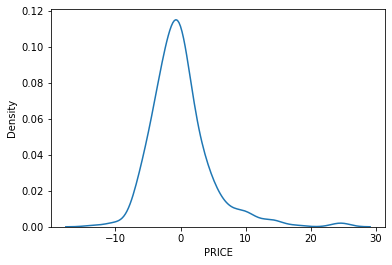

In [21]:
sns.kdeplot(Residual)# density curve

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

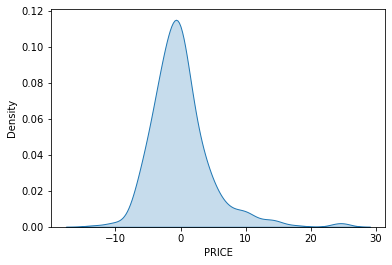

In [22]:
sns.kdeplot(Residual, fill=True)

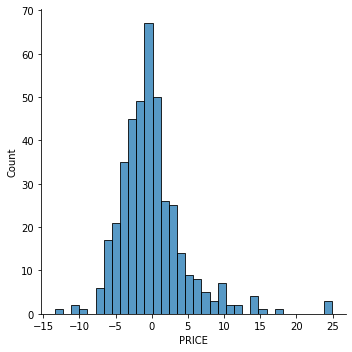

In [23]:
sns.displot(Residual)

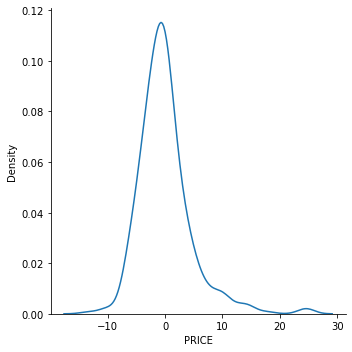

In [24]:
sns.displot(Residual, kind='kde')

In [25]:
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


<AxesSubplot:xlabel='AGE', ylabel='Density'>

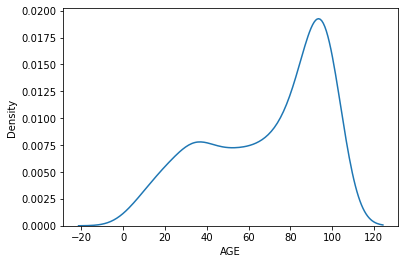

In [26]:
sns.kdeplot(boston_df['AGE'])

<AxesSubplot:xlabel='PRICE', ylabel='Density'>

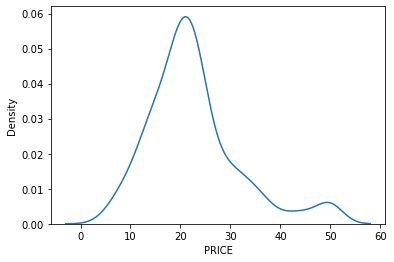

In [27]:
sns.kdeplot(boston_df['PRICE'])

## Skewness

<AxesSubplot:xlabel='AGE', ylabel='Density'>

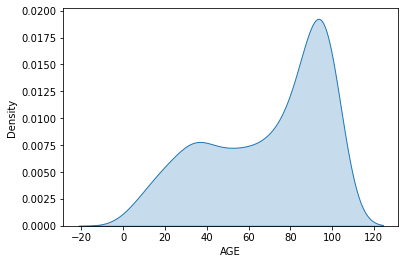

In [28]:
sns.kdeplot(boston_df['AGE'], fill=True)

In [29]:
mean = boston_df['AGE'].mean()
print('Mean is:', mean)

median = boston_df['AGE'].median()
print('Median is:', median)

mode = boston_df['AGE'].mode()
print('Mode is:', mode)

skew = boston_df['AGE'].skew()
print('Skew is:', skew)

Mean is: 68.57490118577078
Median is: 77.5
Mode is: 0    100.0
Name: AGE, dtype: float64
Skew is: -0.5989626398812962


In [30]:
from scipy.stats import skew

In [31]:
skewness = skew(boston_df['AGE'])
print(skewness)

-0.5971855948016143


## Hypothesis Testing

## 1. Shapiro Test

In [32]:
from scipy.stats import shapiro

In [33]:
_ , p_val = shapiro(Residual)
print('P value:', p_val)

if p_val>= 0.05:
    print('Null Hypothesis is True')
    print('Data is normally distributed')
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P value: 6.778984671377457e-17
Alternate Hypothesis is True
Data is not normally distributed


In [34]:
#Task
array = np.random.randn(100) # Normal distributed array
# kdeplot
# mean, median, std
# shapiro
# kstest
# normaltest
# qq plot

In [35]:
_ , p_val = shapiro(array)
print('P value:', p_val)

if p_val>= 0.05:
    print('Null Hypothesis is True')
    print('Data is normally distributed')
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P value: 0.17701026797294617
Null Hypothesis is True
Data is normally distributed


## 2. ks Test

In [36]:
from scipy.stats import kstest

In [37]:
_ , p_val = kstest(Residual, 'norm')
print('P value:', p_val)

if p_val>= 0.05:
    print('Null Hypothesis is True')
    print('Data is normally distributed')
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P value: 6.178075646779299e-37
Alternate Hypothesis is True
Data is not normally distributed


## 3. normal test

In [38]:
from scipy.stats import normaltest

In [39]:
_ , p_val = normaltest(Residual)
print('P value:', p_val)

if p_val>= 0.05:
    print('Null Hypothesis is True')
    print('Data is normally distributed')
else:
    print('Alternate Hypothesis is True')
    print('Data is not normally distributed')

P value: 5.368295989570509e-36
Alternate Hypothesis is True
Data is not normally distributed


## Q-Q Plot

In [40]:
import statsmodels.api as sm

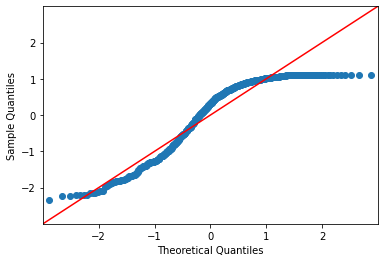

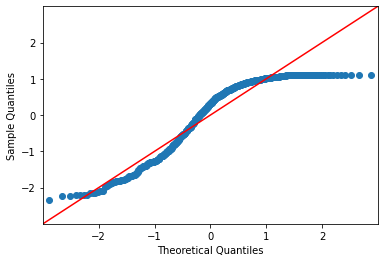

In [41]:
sm.qqplot(boston_df['AGE'],line='45', fit=True)

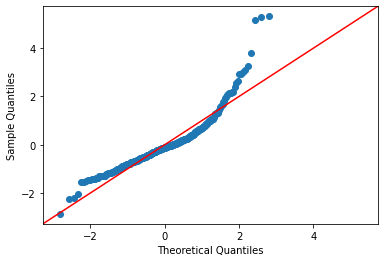

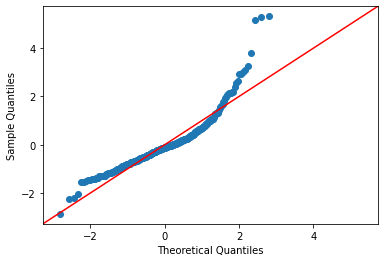

In [42]:
sm.qqplot(Residual, line='45', fit=True)

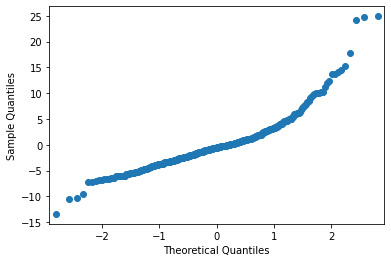

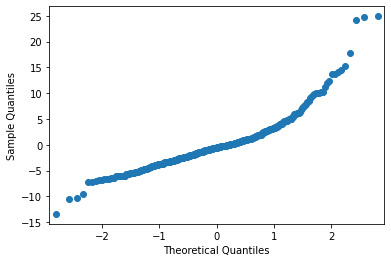

In [43]:
sm.qqplot(Residual)

<AxesSubplot:xlabel='PRICE'>

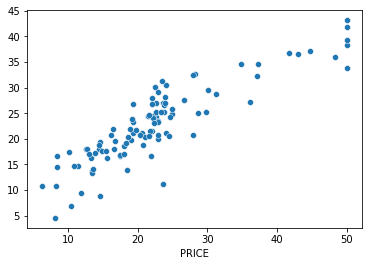

In [44]:
sns.scatterplot(x= y_test, y= y_pred)

<AxesSubplot:xlabel='PRICE', ylabel='PRICE'>

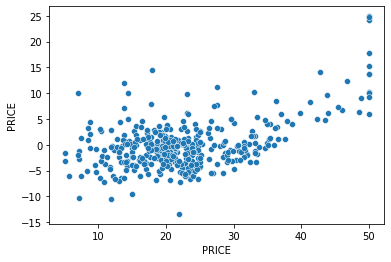

In [45]:
sns.scatterplot(x= y_train, y = Residual)

## Testing of model on user inputs

In [46]:
x_test.head(1)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
307,0.04932,33.0,2.18,0.0,0.472,6.849,70.3,3.1827,7.0,222.0,18.4,396.9,7.53


In [47]:
# x_test[0].shape

In [48]:
x_test.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

## Saving/Dumping the model

In [49]:
import pickle

with open('Linear_model.pkl', 'wb') as f:
    pickle.dump(LR_model, f)

In [50]:
x_test.head(4).T

,307,343,47,67
CRIM,0.04932,0.02543,0.22927,0.05789
ZN,33.00000,55.00000,0.00000,12.50000
INDUS,2.18000,3.78000,6.91000,6.07000
CHAS,0.00000,0.00000,0.00000,0.00000
NOX,0.47200,0.48400,0.44800,0.40900
RM,6.84900,6.69600,6.03000,5.87800
AGE,70.30000,56.40000,85.50000,21.40000
DIS,3.18270,5.73210,5.68940,6.49800
RAD,7.00000,5.00000,3.00000,4.00000
TAX,222.00000,370.00000,233.00000,345.00000


In [51]:
CRIM =0.04932
ZN = 33.0
INDUS = 2.18
CHAS = 0.0
NOX = 0.472
RM = 6.849
AGE = 70.3
DIS = 3.1827
RAD = 7.0
TAX = 222.0
PTRATIO = 18.4
B = 396.9
LSTAT = 7.53

test_array = np.array([CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT], ndmin=2)

def predicted_price(test_array):
    price = LR_model.predict(test_array)[0]
    price = np.around(price,2)
    
    return price

price = predicted_price(test_array)
print(f'Predicted price is: {price}')

Predicted price is: 32.66


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [53]:
scaler.transform(x_train[0].reshape(1,-1))


array([[ -0.4473474 ,  -0.51690063,  -1.70861225,  -1.37931574,
        -12.44205671,  -9.31724491,  -2.45674884,  -1.38391881,
         -1.17845803,  -2.39464026,  -8.62439825,  -3.90324454,
         -1.90710437]])

In [54]:
LR_model.predict(scaler.transform(x_train[0].reshape(1,-1)))

array([266.04460253])